In [1]:
# importing the iris dataset
from sklearn.datasets import load_iris
import pandas as pd
dataset = load_iris() #creating a object
cols = dataset.feature_names #names of the input features
df = pd.DataFrame(dataset.data, columns=cols)


In [2]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
x=df.iloc[:,:-1]


In [6]:
y=df.iloc[:,-1]
print(y)

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64


In [7]:
x=StandardScaler().fit_transform(x) # Scaling X
x=pd.DataFrame(x)
print(x)

            0         1         2
0   -0.900681  1.019004 -1.340227
1   -1.143017 -0.131979 -1.340227
2   -1.385353  0.328414 -1.397064
3   -1.506521  0.098217 -1.283389
4   -1.021849  1.249201 -1.340227
..        ...       ...       ...
145  1.038005 -0.131979  0.819596
146  0.553333 -1.282963  0.705921
147  0.795669 -0.131979  0.819596
148  0.432165  0.788808  0.933271
149  0.068662 -0.131979  0.762758

[150 rows x 3 columns]


In [8]:
from sklearn.decomposition import PCA
pca = PCA() #object
#just on x- pca comes under unsupervised learning
x_pca = pca.fit_transform(x) #applying pca on x
x_pca = pd.DataFrame(x_pca) #converting into a datafram

In [9]:
 pca.components_

array([[ 0.62906623, -0.36114435,  0.68836795],
       [ 0.43339843,  0.89806788,  0.07509912],
       [-0.64532277,  0.25109527,  0.72146357]])

In [10]:
 print('Explained Variance', pca.explained_variance_) # Variation (found by ssd/n-1)

Explained Variance [2.0349965  0.91352474 0.07161299]


In [11]:
 print('Proposition of Explained Variance',pca.explained_variance_ratio_) #proportional form (eg.v1/v1+v2+v3)

Proposition of Explained Variance [0.67380995 0.30247819 0.02371186]


In [13]:
import numpy as np
print('Cumulative Proportion of Explained Variance', np.cumsum(pca.explained_variance_ratio_)) # Cumulative Sum of the above
x_pca['target']=y
x_pca.columns=['PC1','PC2','PC3','PC4']
x_pca.head() #printing with proper header values
 #pc1 = 72 pc1+pc2=96 1+2+3=99
 #pc1 and pc2 are important as they cover 96

Cumulative Proportion of Explained Variance [0.67380995 0.97628814 1.        ]


,PC1,PC2,PC3,PC4
0,-1.857165,0.424131,-0.129827,0.2
1,-1.593939,-0.714558,-0.262449,0.2
2,-1.951778,-0.410390,-0.031468,0.2
3,-1.866616,-0.661099,0.070935,0.2
4,-2.016522,0.578350,0.006166,0.2


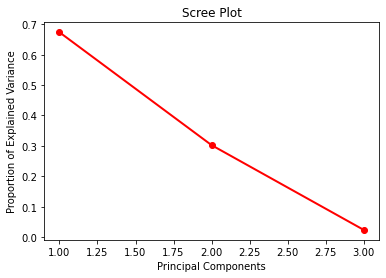

In [14]:
import matplotlib.pyplot as plt
#it has 4 components therefore, 4-- 0 1 2 3
#for graph  +1 -- 1 2 3 4
PC_values = np.arange(pca.n_components_)+1 #

plt.plot(PC_values,pca.explained_variance_ratio_,'ro-',linewidth=2)

plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()

<BarContainer object of 3 artists>

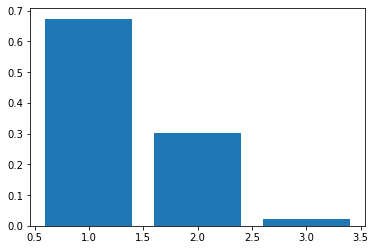

In [15]:
plt.bar(PC_values,pca.explained_variance_ratio_) #bar plot


In [16]:
loadings=pd.DataFrame(pca.components_.T,columns=[f'PC{i+1}' for i in range(pca.n_components_)],index=x.columns)
loadings

,PC1,PC2,PC3
0,0.629066,0.433398,-0.645323
1,-0.361144,0.898068,0.251095
2,0.688368,0.075099,0.721464
